In [ ]:
##imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
options = Options()
options.headless = True  # Run in headless mode (no GUI)
options.add_argument('--no-sandbox')


In [ ]:
## Set the path to the ChromeDriver executable
Service = Service(executable_path='chromedriver.exe')
driver = webdriver.Chrome(service=Service, options=options)

In [ ]:
#Create a function that scrolls down the page until the end, and then returns the page source

def scroll_down(driver):
    old_position = driver.execute_script("return window.pageYOffset;")
    while True:
        # Execute JavaScript to scroll down
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        # Wait for the page to load
        time.sleep(3)  # This delay will depend on the connection speed and server response time
        new_position = driver.execute_script("return window.pageYOffset;")
        if new_position == old_position:
            break  # Exit the loop if the page hasn't scrolled, meaning end of page
        old_position = new_position
    return driver.page_source


In [ ]:
#Open the IMDb Top 250 page
#Save's HTML data to a variable
driver.get('https://www.imdb.com/chart/top/')  

html_data = {"page_source": scroll_down(driver)}

driver.quit()

In [6]:
soup = BeautifulSoup(html_data["page_source"], "html.parser")
print(soup.prettify()[:1000])

<html class="scriptsOn" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/216YVwoRFDL.js">
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script async="" defer="" src="https://launchpad.privacymanager.io/latest/launchpad.bundle.js">
  </script>
  <script async="" src="https://sb.scorecardresearch.com/beacon.js">
  </script>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <title>
   IMDb Top 250 Movies
  </title>
  <meta content="As rated by regular IMDb voters." data-id="main" name="description"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="https://www.imdb.com/chart/top/" property="og:url"/>
  <meta content="IMDb" property="og:site_name"/>
  <meta content="IMDb Top 250 Movies" property="og:title"/>
  <

In [ ]:
#data check should be 250 
movies = soup.find_all('li', class_ = "ipc-metadata-list-summary-item")
print(len(movies))

250


In [ ]:
#Copy and paste the HTML into a new file to help with extraction 
print(movies[0].prettify())

<li class="ipc-metadata-list-summary-item">
 <div class="ipc-metadata-list-summary-item__c">
  <div class="ipc-metadata-list-summary-item__tc">
   <span aria-disabled="false" class="ipc-metadata-list-summary-item__t ipc-btn--not-interactable">
   </span>
   <div class="sc-995e3276-1 jziSZL cli-parent li-compact">
    <div class="sc-995e3276-0 eXDZXb">
     <div class="sc-53e75ceb-0 jrTIkS cli-poster-container">
      <div class="ipc-poster ipc-poster--base ipc-poster--media-radius ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group">
       <div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" data-testid="poster-watchlist-ribbon-add" role="button" tabindex="0">
        <svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg">
         <polyg

In [ ]:
# Extrating the data from the HTML
#Title, Release Year, Length, Rating System, IMDB Rating, Vote Count
movie_data = []
for movie in movies:
    title = movie.find('h3',class_ ="ipc-title__text").text
    Meta_data = movie.find_all('span', class_ = "sc-5179a348-7 idrYgr cli-title-metadata-item")
    Release_Year = Meta_data[0].text if len(Meta_data) > 0 else "N/A"
    Length = Meta_data[1].text  if len(Meta_data) > 1 else "N/A"
    Rating_system = Meta_data[2].text if len(Meta_data) > 2 else "N/A"
    IMDB_Rating = movie.find('span', class_ = "ipc-rating-star--rating").text
    Vote_count = movie.find('span', class_ = "ipc-rating-star--voteCount").text
    movie_data.append({
        "Title": title,
        "Release Year": Release_Year,
        "Length": Length,
        "Rating System": Rating_system,
        "IMDB Rating": IMDB_Rating,
        "Vote Count": Vote_count
    })

#check the data
print(movie_data[0])


  

{'Title': '1. The Shawshank Redemption', 'Release Year': '1994', 'Length': '2h 22m', 'Rating System': 'R', 'IMDB Rating': '9.3', 'Vote Count': '\xa0(3M)'}


In [ ]:
#Convert to a DataFrame
movie_df = pd.DataFrame(movie_data)
movie_df.head()

,Title,Release Year,Length,Rating System,IMDB Rating,Vote Count
0,1. The Shawshank Redemption,1994,2h 22m,R,9.3,(3M)
1,2. The Godfather,1972,2h 55m,R,9.2,(2.1M)
2,3. The Dark Knight,2008,2h 32m,PG-13,9.0,(3M)
3,4. The Godfather Part II,1974,3h 22m,R,9.0,(1.4M)
4,5. 12 Angry Men,1957,1h 36m,Approved,9.0,(923K)


In [11]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          250 non-null    object
 1   Release Year   250 non-null    object
 2   Length         250 non-null    object
 3   Rating System  250 non-null    object
 4   IMDB Rating    250 non-null    object
 5   Vote Count     250 non-null    object
dtypes: object(6)
memory usage: 11.8+ KB


In [ ]:
#Convert the data types
movie_df["Length"] = pd.to_timedelta(movie_df["Length"].str.replace("h", " hours ").replace("m", " minutes "), errors="coerce")


In [ ]:
#Convert the Imdb rating to a float
movie_df["IMDB Rating"] = movie_df["IMDB Rating"].astype(float)

In [ ]:
#convert realse year to a datetime object
movie_df["Release Year"] = pd.to_datetime(movie_df["Release Year"], format="%Y", errors="coerce").dt.year

In [ ]:
# stripping the vote count of the brackets and spaces
movie_df['Vote Count'] = movie_df['Vote Count'].str.replace(r'[()]','', regex=True).str.strip()
movie_df.head()

,Title,Release Year,Length,Rating System,IMDB Rating,Vote Count
0,1. The Shawshank Redemption,1994,0 days 02:22:00,R,9.3,3M
1,2. The Godfather,1972,0 days 02:55:00,R,9.2,2.1M
2,3. The Dark Knight,2008,0 days 02:32:00,PG-13,9.0,3M
3,4. The Godfather Part II,1974,0 days 03:22:00,R,9.0,1.4M
4,5. 12 Angry Men,1957,0 days 01:36:00,Approved,9.0,923K


In [ ]:
#create a function to convert the vote count to a number

def convert_to_number(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1_000_000)
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1_000)
    else:
        return int(value)


In [ ]:
#Apply the function to the 'Vote Count' column
movie_df['Vote Count'] = movie_df['Vote Count'].apply(convert_to_number)  # Remove commas and convert to number

In [18]:
movie_df[['Ranking', 'Title']] = movie_df['Title'].str.extract(r'(\d+)\.\s*(.+)')
movie_df['Ranking'] = movie_df['Ranking'].astype(int)  # Convert Ranking to integer
movie_df['Title'] = movie_df['Title'].str.strip()  # Remove leading/trailing whitespace
movie_df['Rating System'].astype(str)  # Convert Rating System to string
movie_df.head()

,Title,Release Year,Length,Rating System,IMDB Rating,Vote Count,Ranking
0,The Shawshank Redemption,1994,0 days 02:22:00,R,9.3,3000000,1
1,The Godfather,1972,0 days 02:55:00,R,9.2,2100000,2
2,The Dark Knight,2008,0 days 02:32:00,PG-13,9.0,3000000,3
3,The Godfather Part II,1974,0 days 03:22:00,R,9.0,1400000,4
4,12 Angry Men,1957,0 days 01:36:00,Approved,9.0,923000,5


In [19]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Title          250 non-null    object         
 1   Release Year   250 non-null    int32          
 2   Length         250 non-null    timedelta64[ns]
 3   Rating System  250 non-null    object         
 4   IMDB Rating    250 non-null    float64        
 5   Vote Count     250 non-null    int64          
 6   Ranking        250 non-null    int64          
dtypes: float64(1), int32(1), int64(2), object(2), timedelta64[ns](1)
memory usage: 12.8+ KB


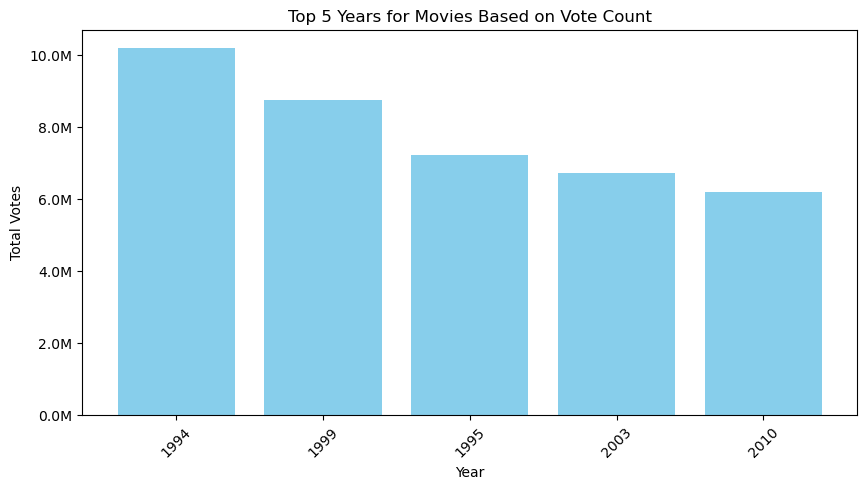

In [ ]:
#look for the years with the most votes
# Group by 'Release Year' and sum the 'Vote Count'
# Create a new DataFrame with the total votes for each year
import matplotlib.ticker as tick 
popularity_df = movie_df.groupby('Release Year').agg({'Vote Count': 'sum'}).reset_index()

# Get top 5 years
top_5_years = popularity_df.nlargest(5, 'Vote Count')

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_5_years['Release Year'].astype(str), top_5_years['Vote Count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Top 5 Years for Movies Based on Vote Count')
plt.xticks(rotation=45)
plt.gca().get_yaxis().get_major_formatter().set_useOffset(False)  # Prevent scientific notation
plt.gca().yaxis.set_major_formatter(tick.FuncFormatter(lambda x, _: f'{x / .1e7:.1f}M'))


plt.show()


In [ ]:
#look for the years with the most movies
movie_df.loc[movie_df['Release Year']== 1994].head(25)

,Title,Release Year,Length,Rating System,IMDB Rating,Vote Count,Ranking
0,The Shawshank Redemption,1994,0 days 02:22:00,R,9.3,3000000,1
7,Pulp Fiction,1994,0 days 02:34:00,R,8.9,2300000,8
10,Forrest Gump,1994,0 days 02:22:00,PG-13,8.8,2400000,11
35,The Lion King,1994,0 days 01:28:00,G,8.5,1200000,36
42,Léon: The Professional,1994,0 days 01:50:00,R,8.5,1300000,43


In [ ]:
#Write the DataFrame to a CSV file
movie_df.to_csv('movie_df.csv', index=False, mode='w')